# Working Directory

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [3]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


## Fine-tune YOLO11 on custom dataset

This code sets up a directory for datasets, installs the Roboflow library, and downloads a tree detection dataset in YOLOv11 format using the provided API key. It prepares the environment for working with the dataset in Google Colab.

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="z0ZjC0t4ZSOQoc2Bmm2n")
project = rf.workspace("ghost-8jb1k").project("leaves-aeukf-6qi8e-q8c21-cr56n")
version = project.version(1)
dataset = version.download("yolov11")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to leaves-1 in yolov11:: 100%|██████████| 508/508 [00:00<00:00, 1694.26it/s]


## Train YOLOv11 Model

In [5]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 277MB/s]
New https://pypi.org/project/ultralytics/8.3.70 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/leaves-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=Non

# Results Directory

In [6]:
!ls {HOME}/runs/detect/train/

args.yaml					    labels.jpg	  train_batch0.jpg
confusion_matrix_normalized.png			    P_curve.png   train_batch1.jpg
confusion_matrix.png				    PR_curve.png  train_batch2.jpg
events.out.tfevents.1738334056.72609aff2ecc.2135.0  R_curve.png   val_batch0_labels.jpg
F1_curve.png					    results.csv   val_batch0_pred.jpg
labels_correlogram.jpg				    results.png   weights


# Confusion Matrix from Training Results

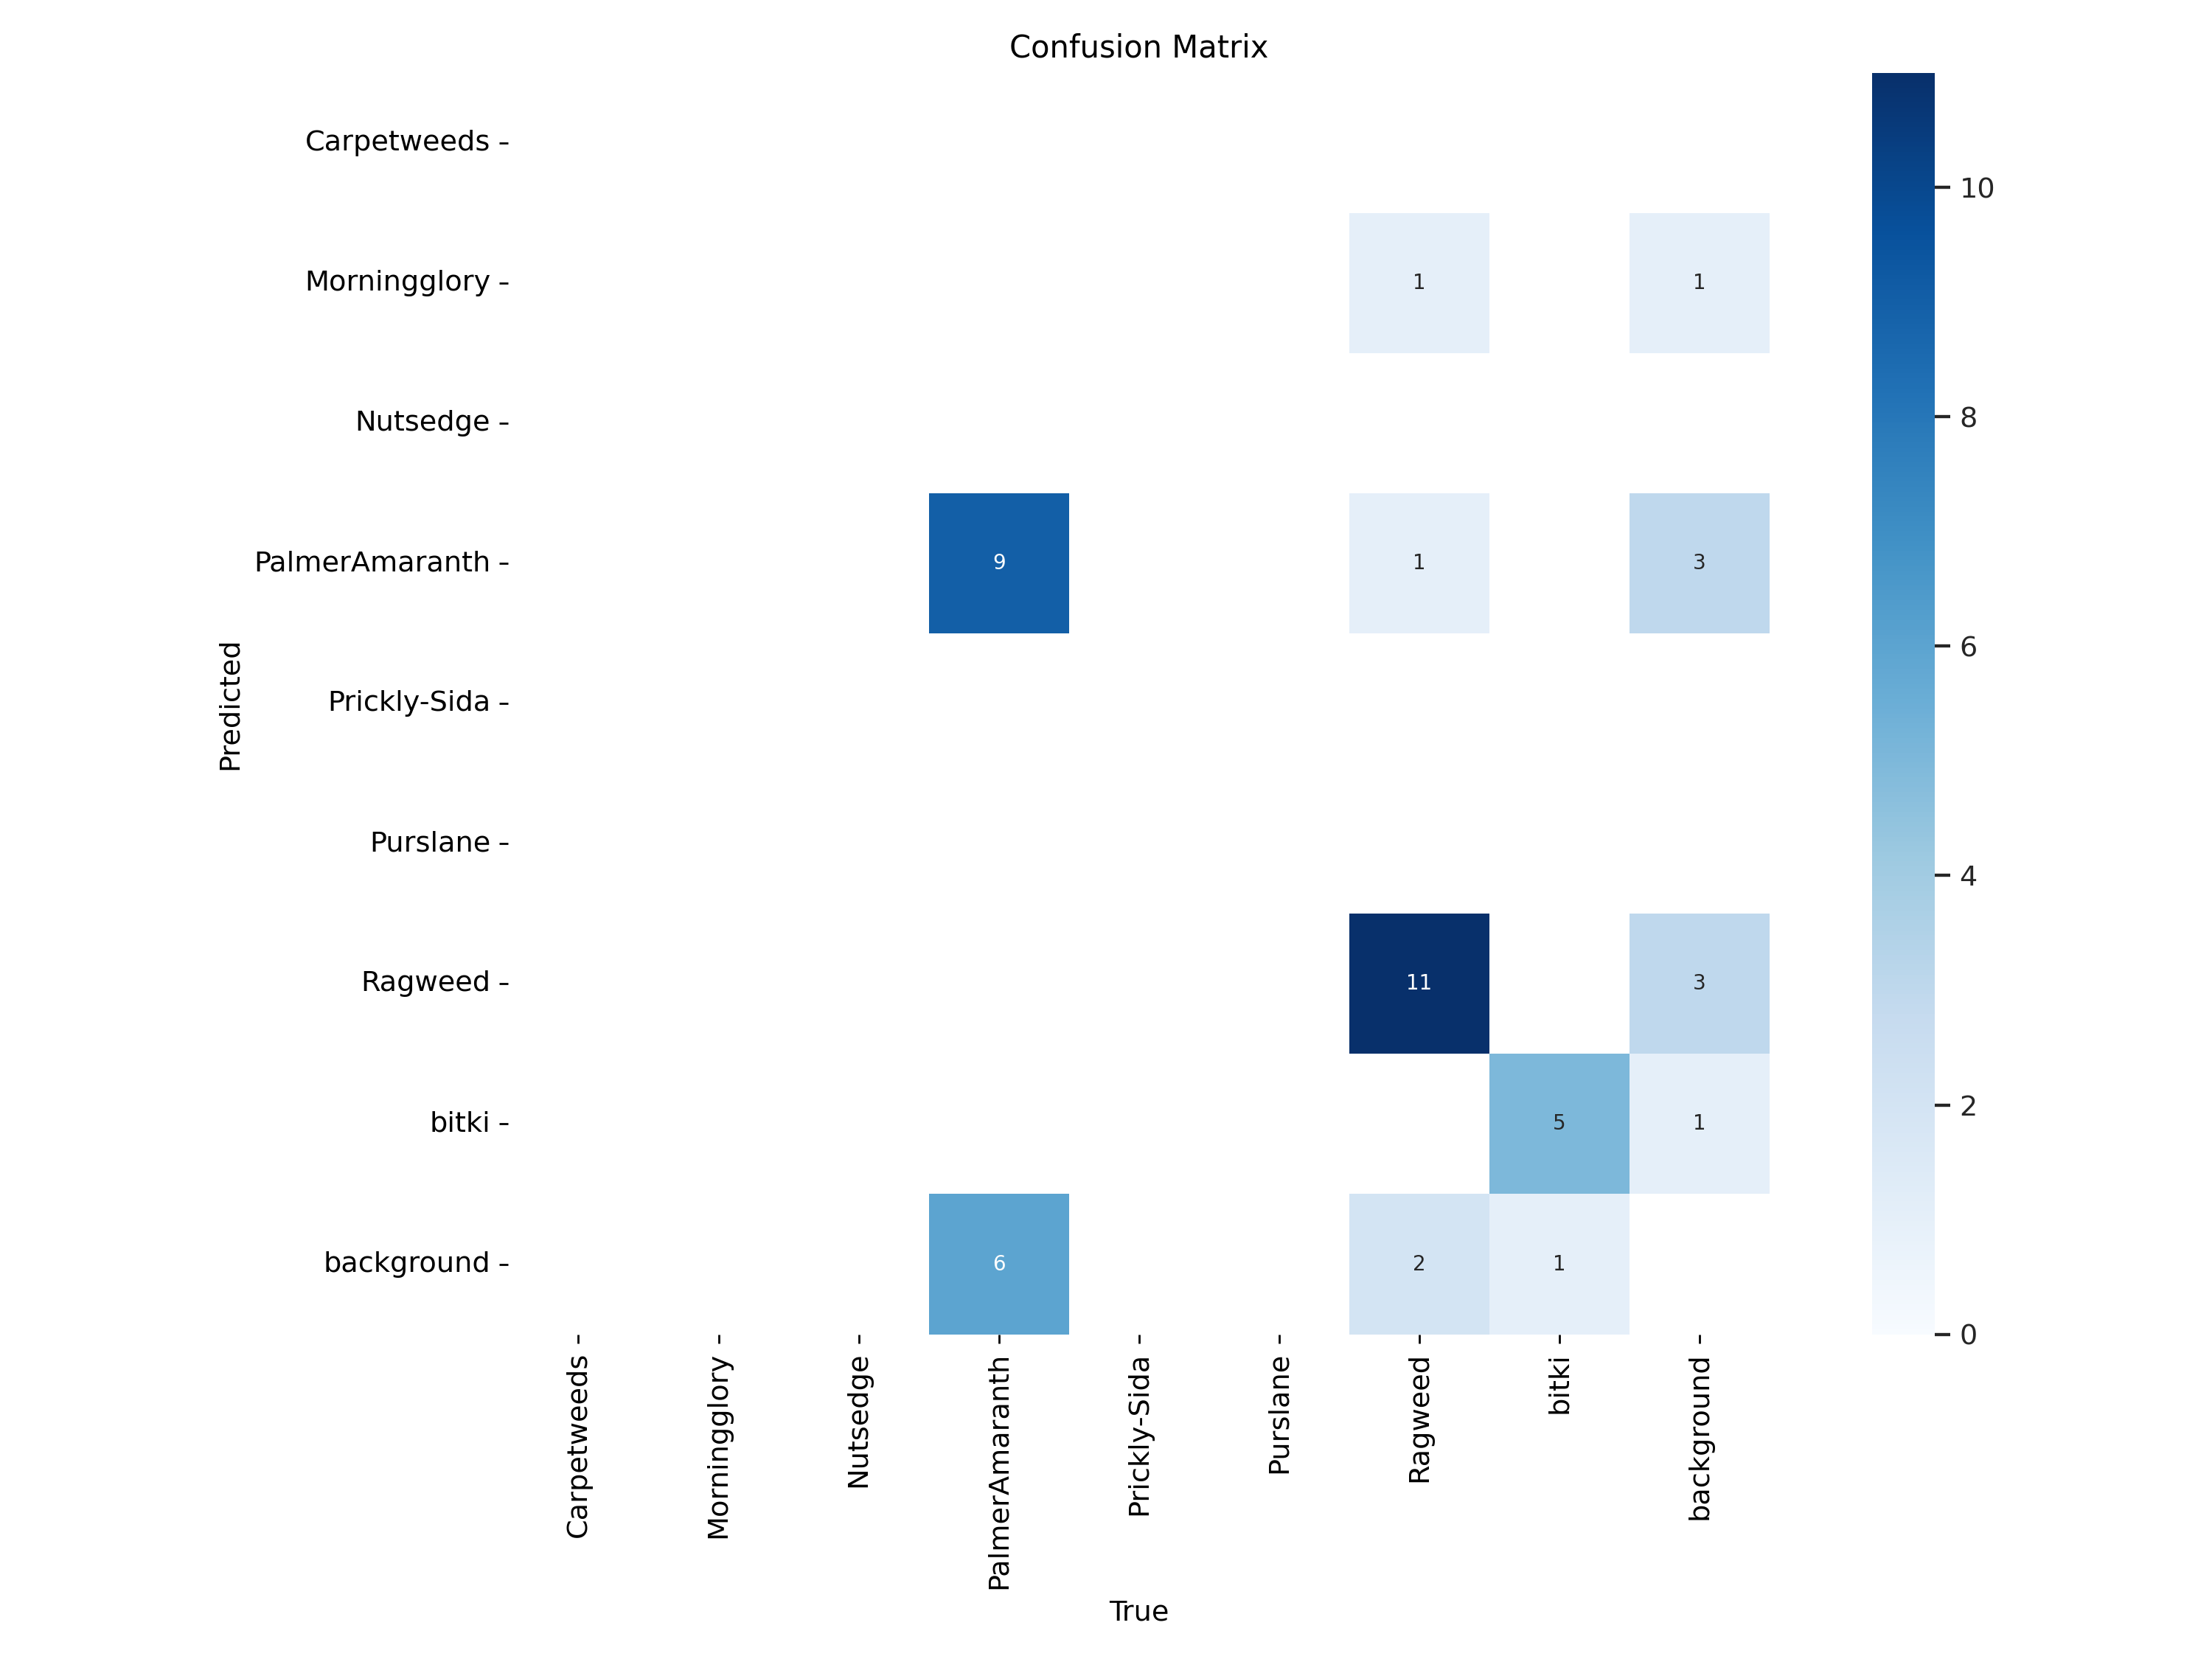

In [7]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=800)

# Training Results Visualization


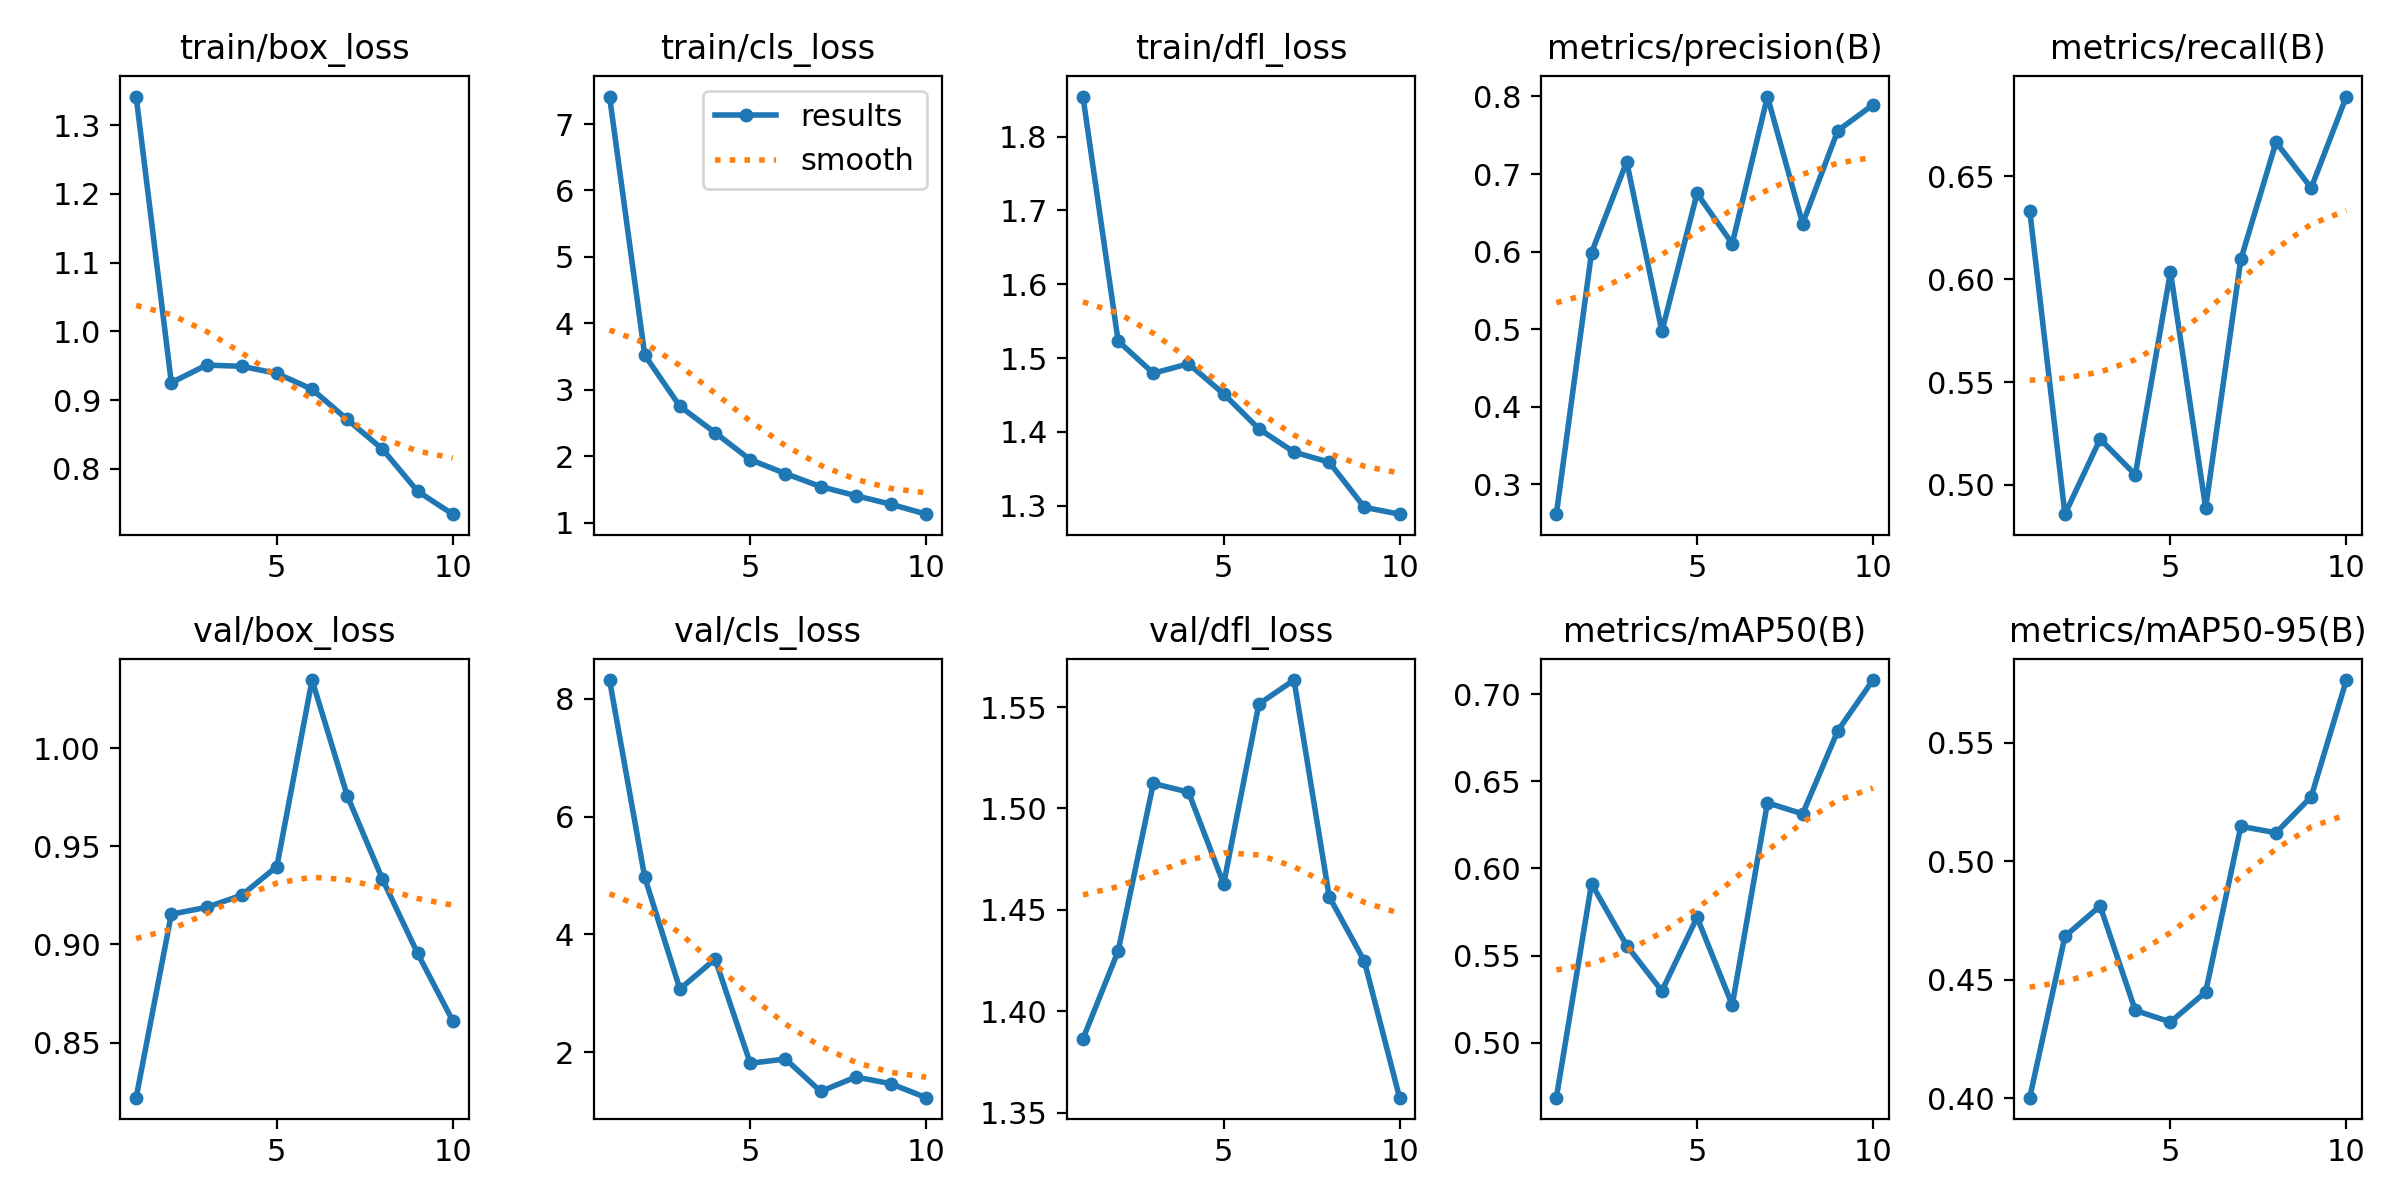

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=800)

# Validation Predictions

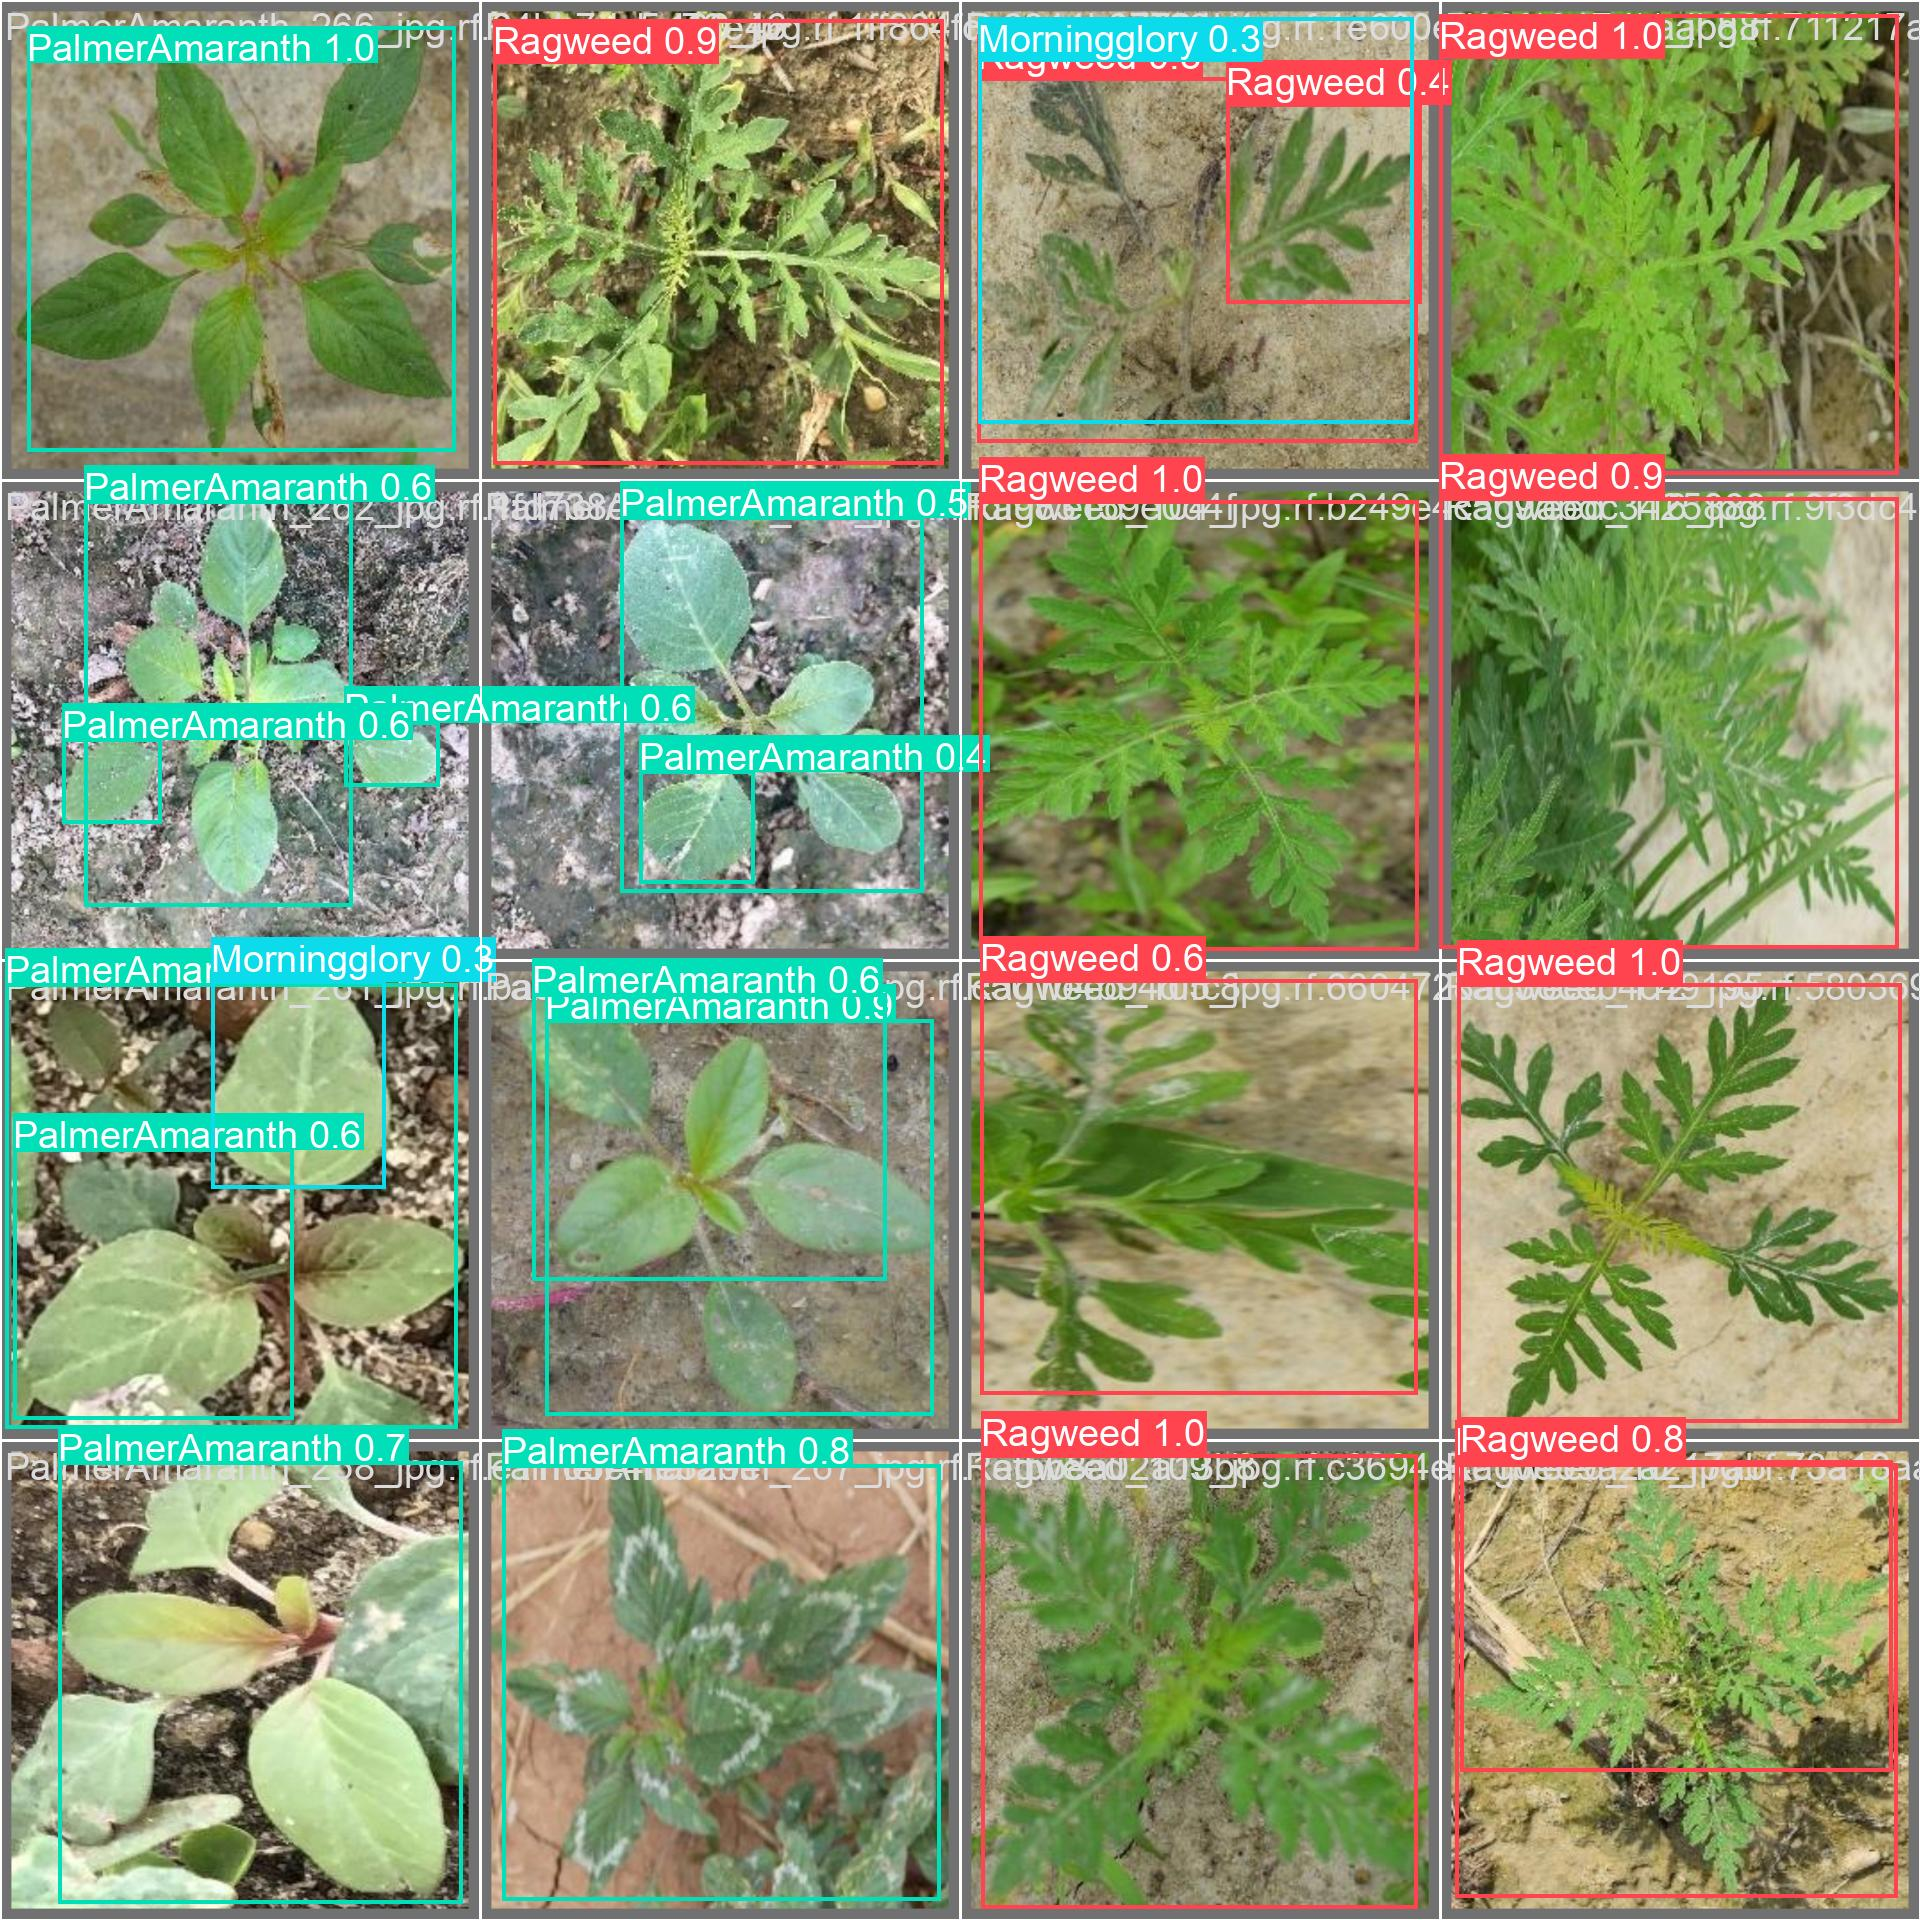

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=800)

## Validate fine-tuned model

In [10]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,415,896 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/leaves-1/valid/labels.cache... 24 images, 0 backgrounds, 0 corrupt: 100% 24/24 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 32, len(boxes) = 36. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:00<00:00,  2.30it/s]
                   all         24         36      0.767      0.689      0.691      0.566
        PalmerAmaranth          7         15      0.745        0.6      0.551      0.387
               Ragweed         13         15      0.896        0.8      0.853      0.764
                 bitki          4          6 

## Inference with custom model

In [11]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,415,896 parameters, 0 gradients, 21.3 GFLOPs

image 1/24 /content/datasets/leaves-1/test/images/342_jpg.rf.82aebcf3b6e69cd01e3d94987fdf7d89.jpg: 640x384 1 bitki, 45.6ms
image 2/24 /content/datasets/leaves-1/test/images/346_jpg.rf.065ceee5415c6afe917268dcadcbc6c6.jpg: 640x384 1 bitki, 10.9ms
image 3/24 /content/datasets/leaves-1/test/images/349_jpg.rf.5839b4d97e7479c2134ba1f3dca60b71.jpg: 640x384 1 bitki, 10.9ms
image 4/24 /content/datasets/leaves-1/test/images/365_jpg.rf.4dfc721f23221153074dc0c3b50c1a5a.jpg: 640x384 2 bitkis, 10.8ms
image 5/24 /content/datasets/leaves-1/test/images/376_jpg.rf.5d4ef21c1196b333cc20719651f7a2af.jpg: 640x384 1 bitki, 10.8ms
image 6/24 /content/datasets/leaves-1/test/images/400_jpg.rf.91ffeb0c2f18f6a2a955e0438b86676a.jpg: 640x384 1 bitki, 10.8ms
image 7/24 /content/datasets/leaves-1/test/images/406_jpg.rf.28f0aecd9aa8eed71fd5a15ffdd9ec17.

**NOTE:** Let's take a look at few results.

# Latest Prediction Results

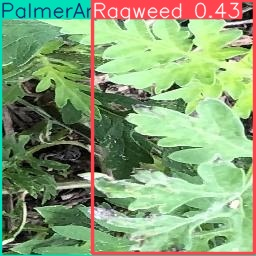

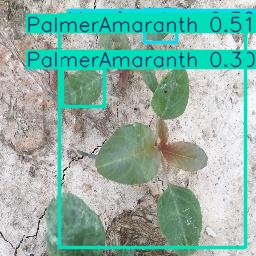

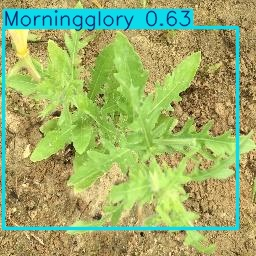

In [12]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

## Export Model to TensorFlow.js Format



In [13]:
!yolo export task=detect model={HOME}/runs/detect/train/weights/best.pt format=tfjs save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)
YOLO11s summary (fused): 238 layers, 9,415,896 parameters, 0 gradients, 21.3 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 12, 8400) (18.3 MB)
E0000 00:00:1738334204.681494    2924 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738334204.690495    2924 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This 

## Compress the TensorFlow.js Model


It can be conveniently downloaded from the compressed ZIP file.

In [14]:
import shutil

folder_path = "/content/runs/detect/train/weights/best_web_model"
zip_path = "./tfjs_model.zip"
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', folder_path)

'/content/tfjs_model.zip'